# **Glenn Hakim - 2208107010072**

# Dataset: Fashion MNIST from Keras

## Import required library

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import json
import datetime

## Data preparation

### Load dataset

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [16]:
print(f"Number of training images: {x_train.shape[0]}")
print(f"Number of test images: {x_test.shape[0]}")

print(f"\nTraining data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Number of training images: 60000
Number of test images: 10000

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### Define class names

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocessing

In [18]:
def preprocess_data(images):
    """
    Preprocess images by normalizing and adding channel dimension
    """
    images = images.astype('float32') / 255.0
    images = images[..., np.newaxis]
    return images

x_train_processed = preprocess_data(x_train)
x_test_processed = preprocess_data(x_test)


### Split data test and train

In [19]:

x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_processed, y_train, 
    test_size=0.2, 
    random_state=42
)

## Data visualization

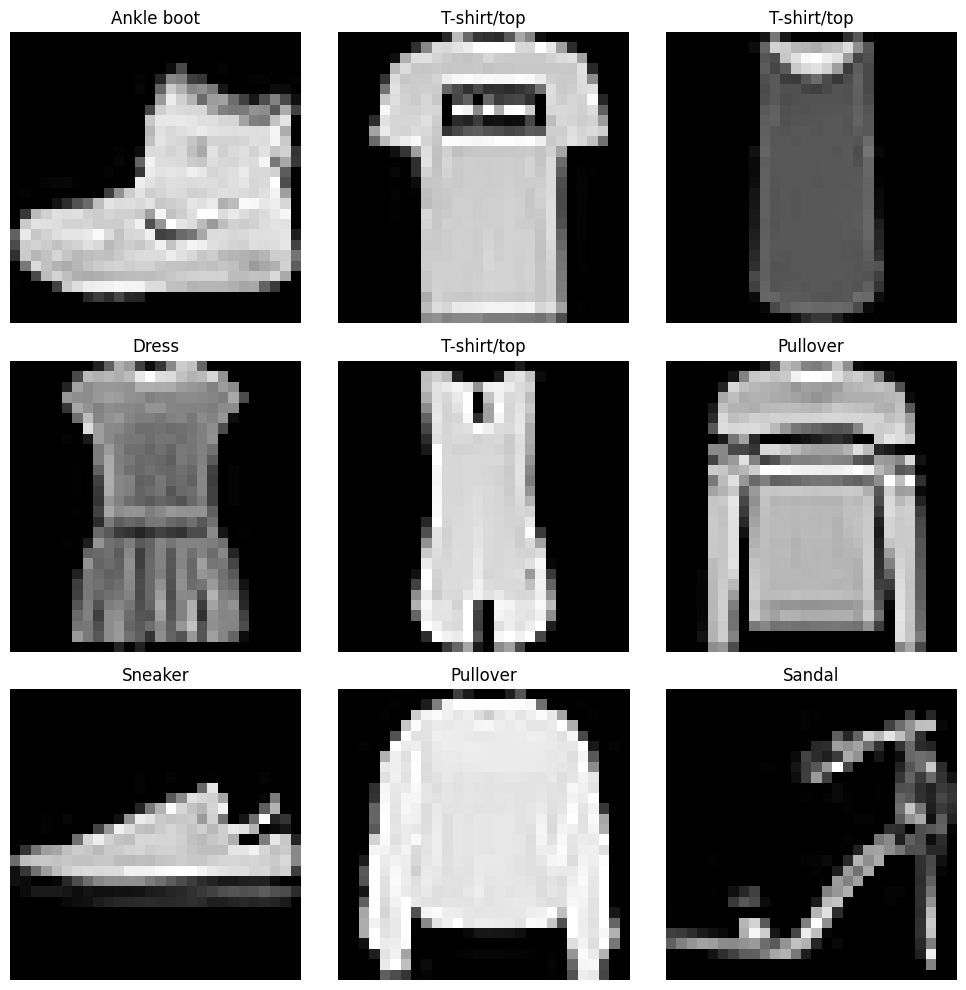

In [20]:
def plot_mnist_examples(images, labels, class_names, num_examples=9):
    """
    Plot multiple examples from the dataset
    """
    plt.figure(figsize=(10, 10))
    for i in range(num_examples):
        plt.subplot(3, 3, i + 1)
        # Remove the channel dimension for plotting
        img_to_plot = images[i].squeeze() if images[i].ndim == 3 else images[i]
        plt.imshow(img_to_plot, cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_mnist_examples(x_train, y_train, class_names)

## Build model

In [21]:
def create_model():
    """
    Create and return the CNN model
    """
    model = models.Sequential([
        layers.InputLayer(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

## Training model

In [22]:
log_dir = "event-tensorboard/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [23]:
history = model.fit(
    x_train_final, y_train_final,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7627 - loss: 0.6899 - val_accuracy: 0.8898 - val_loss: 0.3021
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8728 - loss: 0.3602 - val_accuracy: 0.9043 - val_loss: 0.2645
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8879 - loss: 0.3114 - val_accuracy: 0.9106 - val_loss: 0.2462
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.8959 - loss: 0.2962 - val_accuracy: 0.9077 - val_loss: 0.2581
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.8990 - loss: 0.2812 - val_accuracy: 0.9158 - val_loss: 0.2269
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9017 - loss: 0.2747 - val_accuracy: 0.9043 - val_loss: 0.2973
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9100 - loss: 0.2493 - val_accuracy: 0.8808 - val_loss: 0.3234
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9053 -

## Visualization of training result

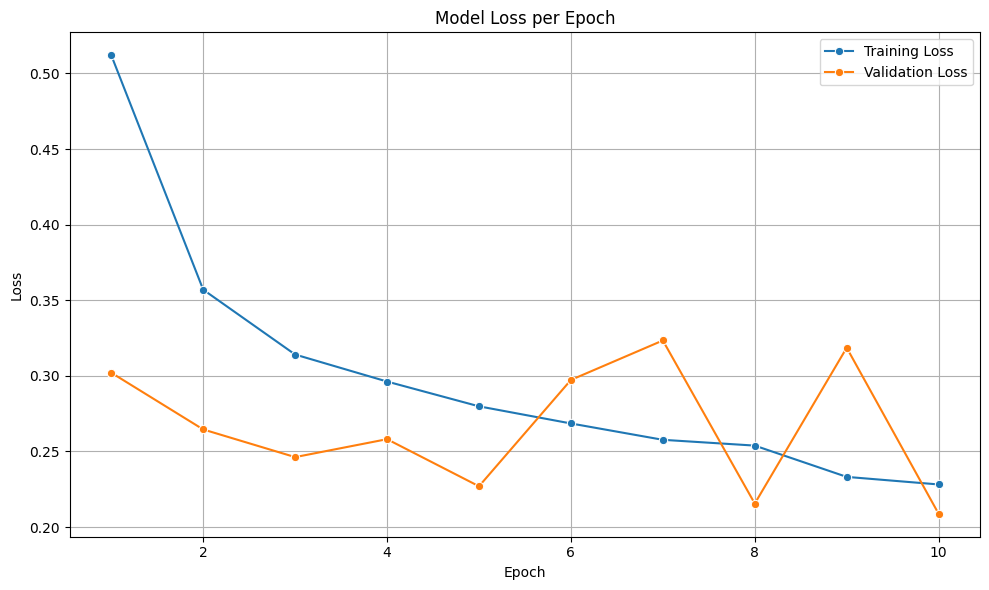

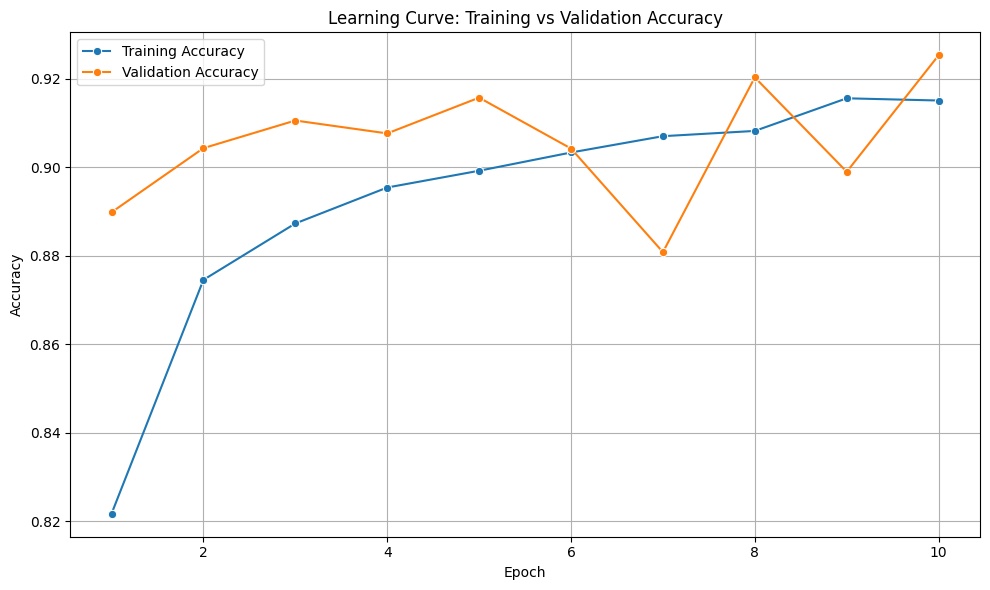

In [24]:
# Loss visualization
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=range(1, len(history.history['loss']) + 1),
    y=history.history['loss'],
    label='Training Loss',
    marker='o'
)
sns.lineplot(
    x=range(1, len(history.history['val_loss']) + 1),
    y=history.history['val_loss'],
    label='Validation Loss',
    marker='o'
)
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Learning curve visualization
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=range(1, len(history.history['accuracy']) + 1),
    y=history.history['accuracy'],
    label='Training Accuracy',
    marker='o'
)
sns.lineplot(
    x=range(1, len(history.history['val_accuracy']) + 1),
    y=history.history['val_accuracy'],
    label='Validation Accuracy',
    marker='o'
)
plt.title('Learning Curve: Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Save model and preprocessing params

In [26]:
model.save(f"model/fashion_mnist_model_{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5")

preprocess_params = {
    'normalization_factor': 255.0,
    'input_shape': (28, 28, 1),
    'class_names': class_names
}

os.makedirs('preprocess', exist_ok=True)
with open('preprocess/preprocess_params.json', 'w') as f:
    json.dump(preprocess_params, f)

# Run TensorBoard
print("\nRun the following command to start TensorBoard:\n")
print("tensorboard --logdir=event-tensorboard/fit")


Run the following command to start TensorBoard:

tensorboard --logdir=event-tensorboard/fit
